In [58]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("seaborn")

In [68]:
with open('./logs.json') as f:
    data = json.load(f)
df = pd.json_normalize(data["Isaac Sim Data"], meta=["data", ["joint_positions", "applied_joint_positions"]])

In [69]:
df.columns = ["time", "timestep", "joint_position", "desired_joint_position"]

In [70]:
df

,time,timestep,joint_position,desired_joint_position
0,0.025000,3,"[[0.0006390805938281119, -0.023326512426137924...","[[0.01644926704466343, 0.0, 0.0, -0.0697999894..."
1,0.033333,4,"[[0.006312406621873379, -0.01310260221362114, ...","[[0.032898083329200745, 0.0, 0.0, -0.069799989..."
2,0.041667,5,"[[0.01328403502702713, -0.005801275838166475, ...","[[0.04934599623084068, 0.0, 0.0, -0.0697999894..."
3,0.050000,6,"[[0.021578148007392883, 0.0038283944595605135,...","[[0.06579255312681198, 0.0, 0.0, -0.0697999894..."
4,0.058333,7,"[[0.030776076018810272, 0.015837201848626137, ...","[[0.08223731070756912, 0.0, 0.0, -0.0697999894..."
...,...,...,...,...
882,7.375000,885,"[[-2.8838658332824707, 0.012517356313765049, 0...","[[-2.8972997665405273, 0.0, 0.0, -0.0697999894..."
883,7.383334,886,"[[-2.8842830657958984, 0.012545013800263405, 0...","[[-2.8972997665405273, 0.0, 0.0, -0.0697999894..."
884,7.391667,887,"[[-2.884770393371582, 0.012572269886732101, 0....","[[-2.8972997665405273, 0.0, 0.0, -0.0697999894..."
885,7.400000,888,"[[-2.885322332382202, 0.012598966248333454, 0....","[[-2.8972997665405273, 0.0, 0.0, -0.0697999894..."


In [71]:
positions = np.array(df["joint_position"].values.tolist())
targets = np.array(df["desired_joint_position"].values.tolist())
times = np.array(df["time"].values.tolist())

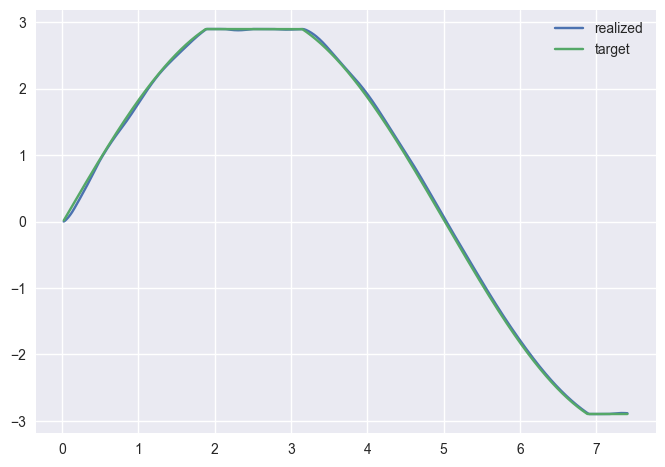

In [72]:
joint_idx = 0
env_idx = 0
plt.plot(times, positions[:,env_idx,joint_idx])
plt.plot(times, targets[:,env_idx,joint_idx])
plt.legend(["realized", "target"])